In [2]:
#Load Libraries

%pylab inline
import scipy.stats
import numpy as np
import pandas as pd
from collections import defaultdict
import os
from collections import Counter
import operator
import re
import sys 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
pd.set_option('expand_frame_repr',True)
from datetime import datetime, date
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib


C:\Users\abdul\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
noc=[]

In [5]:
#Combining dataset from 400 files in one file

myfile = open("17-24-.txt","w")
#edit = open("edit.txt","w")
def files_to_dataset(folder_name):
    doc = open("activityscores.txt","r")
    filename = ""
    j=0
    count = 0
    
    while(j!=401):
        if(j<10):
            filename = folder_name+"/00"+str(j)+".txt"
            if(os.path.isfile(filename)!=True):
                j+=1
                j-=1
            else:
            #print '1'
                for line in open(filename):
                    line = line.rstrip('\n')
                    line = re.sub("\s+", ",", line.strip())
                    myfile.write(line)
                    myfile.write('\n')
                    count+=1
                noc.append(count)
                count=0

        elif(j<100):
            
            filename = folder_name+"/0"+str(j)+".txt"
            if(os.path.isfile(filename)!=True):
                j+=1
                j-=1
            else:
            #print '2'
                for line in open(filename):
                    line = line.rstrip('\n')
                    line = re.sub("\s+", ",", line.strip())
                    myfile.write(line)
                    myfile.write('\n')
                    count+=1
                noc.append(count)
                count=0
        else:
           
            filename = folder_name+"/"+str(j)+".txt"
            if(os.path.isfile(filename)!=True):
                j+=1
                j-=1
            else:
            #print '3'
                for line in open(filename):
                    line = line.rstrip('\n')
                    line = re.sub("\s+", ",", line.strip())
                    myfile.write(line)
                    myfile.write('\n')
                    count+=1
                noc.append(count)
                count=0
        j+=1

    return True

files_to_dataset('17-24 cleaned data new origional')
myfile.close()

In [6]:
print len(noc)

179


In [38]:
#Read Combined Dataset
import csv
#error_bad_lines=False
data=pd.read_csv('./17-24.txt',names= ['time','sensor id','state','4','5','6','7'],low_memory=False)
#data = pd.read_csv('./dataset.txt', parse_dates=True, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
#data['time']=pd.to_datetime(data['time'])

In [9]:
data = data.loc[1:3368]

In [39]:
#Extending the row and columns to load in csv
pd.options.display.max_rows=10000000
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 100
pd.options.display.max_rows
#print data['sensor id'].size

10000000

In [40]:
#opening diagnose score and avtivity score file to assgin as a ground truth
doc = open("activityscores.txt","r")
diagnosis = pd.read_csv('diagnosis.csv',sep=',')

score = doc.readlines()
s1 = [a.strip().split(' ') for a in score]
new = []
index = 0
j = 0
for i in range(len(noc)):
    new = s1[i]
    if(i==0):
        index = noc[i]
        data.loc[i:index,'last'] = new[-1]
        data.loc[i:index,'2nd-last'] = new[-2]
        data.loc[i:index,'Diagnosis'] = diagnosis.iloc[i,1]
    else:
        index = noc[i]
        j += noc[i-1] 
        data.loc[j:j+index,'last'] = new[-1]
        data.loc[j:j+index,'2nd-last'] = new[-2]
        data.loc[j:j+index,'Diagnosis'] = diagnosis.iloc[i,1]

In [41]:
print data.loc[1]

time         09:00:10.378848
sensor id               M052
state                    OFF
4                        NaN
5                        NaN
6                        NaN
7                        NaN
last                       3
2nd-last                  18
Diagnosis                  4
Name: 1, dtype: object


In [ ]:
#Extracting 1t-24 complex interwoven activities, parralelism vector, sequnec score, time etc.
#testin = open("testnew.txt","w")
doc = open("activityscores.txt","r")
score = doc.readlines()
s1 = [a.strip().split(' ') for a in score]
#print s1
df2=pd.DataFrame(columns=['time','sensor id','state','4','5','6','7','last','2nd-last'])
m=1
p=0
#doc = open("./activityscores.txt","r")
n=0
j=17
i=1
ss=0
var = 0
end = 0
loi = []
v=0
flag = False
count = 0
ts = 0
te = 0
g=1

l = ['17','18','19','20','21','22','23','24']

while(i!=len(data['sensor id'])):
    if(j<25):
        if(data.loc[i,'4']==str(j)+"-start" or data.loc[i,'4']==str(j+1)+"-start" or data.loc[i,'4']==str(j+2)+"-start" or data.loc[i,'4']==str(j+3)+"-start" or data.loc[i,'4']==str(j+4)+"-start" or data.loc[i,'4']==str(j+5)+"-start" or data.loc[i,'4']==str(j+6)+"-start" or data.loc[i,'4']==str(j+7)+"-start"):
            
            if(data.loc[i,'4']==str(j+1)+"-start"):
                j=j+1
            elif(data.loc[i,'4']==str(j+2)+"-start"):
                j=j+2
            elif(data.loc[i,'4']==str(j+3)+"-start"):
                j=j+3
            elif(data.loc[i,'4']==str(j+4)+"-start"):
                j=j+4
            elif(data.loc[i,'4']==str(j+5)+"-start"):
                j=j+5
            elif(data.loc[i,'4']==str(j+6)+"-start"):
                j=j+6
            elif(data.loc[i,'4']==str(j+7)+"-start"):
                j=j+7
            var+=1
            no = s1[v] 
            #print 'line no',v
            #print 'j',j
            #print 'line',no
            k=i+1
            ts=i
            m=j
            #print 'm',m
            count=0
            lst = []
            temp = 0
            rle = 0
            rle = i
            for g in range(17,25):
                lst.append(str(g)+'-start')
                #lst.append(str(g)+'-incomplete')
            
            while(data.loc[k,'4']!=str(j)+"-end"): #and k!=(len(data['sensor id'])-1)
                if(data.loc[k,'4'] in lst):
                    temp+=1
                    data.loc[rle:k+1,'activity-level'] = temp
                    rle = k+1   
                k+=1
                count+=1
                #data.loc[i:k+1,'activity-level'] = temp
            end+=1
            halrm = 0
            lalrm = 0
            M = 0
            N = 0
            c=0
            for x in range(i,k): 
                M = data.loc[x,'activity-level']
                _,N = np.unique(data.loc[i:x+1,'sensor id'],return_counts=True)
                data.loc[x,'HALRM'] = M*float(len(N))
                c = len(N)/float(M)
                data.loc[x,'LALRM'] = c
                data.loc[x,'Pindex'] = data.loc[x,'HALRM'] / float(data.loc[x,'HALRM'])
        
            te = k
            
            loi.append(count)
            sdate = data.loc[i,'time']
            sdate = sdate[0:8]
            edate = data.loc[k,'time']
            edate = edate[0:8]
            FMT = '%H:%M:%S'
            
            tdelta = datetime.strptime(edate, FMT) - datetime.strptime(sdate, FMT)
            line = data[i:k+1]
            
            line.loc[ts:te+1,'start_time'] = sdate
            line.loc[ts:te+1,'end_time'] = edate
            line.loc[i:k+1,'duration']=tdelta
            line.loc[i:k+1,'interrupt'] = temp
            if (temp == 8):
                line.loc[i:k+1,'check for all act']= 1
            else:
                line.loc[i:k+1,'check for all act']= 0
            if(n<8):
                line.loc[i:k+1,'activity']=l[n]
            else:
                n=0
                line.loc[i:k+1,'activity']=l[n]
            #if(m<9):
            #    cpy = no[m]
                #print 'm-val',cpy
            #    line.loc[i:k+1,'score']=cpy
            #else:
            #    m=1
            #   cpy = no[m]
            #    line.loc[i:k+1,'score']=cpy
            
            df2=df2.append(line)
            #testin.write(str(line))
            #testin.write('\n')
            j+=1
            m+=1
            i=k  
            n+=1
            #p+=1 
    elif(j>24):
        j=17  
        v+=1
        m=1
    i+=1
print var
print end
#testin.close()

In [60]:
print len(df2)
df2[:20]

34742


,level_0,index,2nd-last,4,5,6,7,Diagnosis,HALRM,LALRM,...,activity-level,check for all act,duration,end_time,interrupt,last,sensor id,start_time,state,time
0,0,2980,18,17-start,NaN,NaN,NaN,4.0,1.0,1.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:00.015164
1,1,2981,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:04.619513
2,2,2982,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:24.145641
3,3,2983,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:25.641563
4,4,2984,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:12:35.451504
5,5,2985,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:12:37.20635
6,6,2986,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M052,11:11:00,ON,11:13:06.868719
7,7,2987,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M052,11:11:00,OFF,11:13:20.171342
8,8,2988,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:13:21.476273
9,9,2989,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,...,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:13:24.158518


In [66]:
df2.drop('level_0', axis=1, inplace=True)

In [67]:
df2[:20]

,2nd-last,4,5,6,7,Diagnosis,HALRM,LALRM,Pindex,activity,activity-level,check for all act,duration,end_time,interrupt,last,sensor id,start_time,state,time
0,18,17-start,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:00.015164
1,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:04.619513
2,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:24.145641
3,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:25.641563
4,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:12:35.451504
5,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:12:37.20635
6,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M052,11:11:00,ON,11:13:06.868719
7,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M052,11:11:00,OFF,11:13:20.171342
8,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:13:21.476273
9,18,NaN,NaN,NaN,NaN,4.0,2.0,2.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:13:24.158518


In [53]:
l = [1,2,3,4,2]
s = pd.Series([1,2,3,4,5,2,3])
a,b = np.unique(s,return_counts=True)
b[1],sum(b),b

(2, 7, array([1, 2, 2, 1, 1], dtype=int64))

In [17]:
df2.to_csv('c4.csv',sep=',')

In [21]:
df2 = pd.read_csv('c4.csv')
print df2[:20]

    Ref  2nd-last         4    5    6    7  Diagnosis  HALRM  LALRM  Pindex  \
0     1        18  17-start  NaN  NaN  NaN          4    1.0    1.0     1.0   
1     2        18       NaN  NaN  NaN  NaN          4    1.0    1.0     1.0   
2     3        18       NaN  NaN  NaN  NaN          4    1.0    1.0     1.0   
3     4        18       NaN  NaN  NaN  NaN          4    1.0    1.0     1.0   
4     5        18       NaN  NaN  NaN  NaN          4    1.0    1.0     1.0   
5     6        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
6     7        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
7     8        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
8     9        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
9    10        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
10   11        18       NaN  NaN  NaN  NaN          4    2.0    2.0     1.0   
11   12        18       NaN  NaN  NaN  NaN          

In [70]:
len(loi)

437

In [73]:
#count the each unique sensor event
i=0
import pdb
count = 0
loc = []
j=17
z = 0
while(i!=len(df2['sensor id'])):
    if(j<25):
        if(df2.loc[i,'4']==str(j)+"-start"):
            count = 0
            z=i+1
            while(df2.loc[z,'4']!=str(j)+"-end"):
                count+=1
                z+=1
            print count
            #pdb.set_trace()
            loc.append(count)
            j+=1
    elif(j>=25):  
        j=17  
    i+=1

352
94
63
120
180
99
78
13
61
111
11
135
735
159
711
5
166
229
4
148
4
25
73
136
15
84
700
224
83
193
395
8
7
97
55
255
4
83
1338
2
170
53
24
229
107
59
176
12
77
214
425
355
8
58
2384
13
29
813
1
84
651
253
1696
203
130
94
191
385
1
120
240
10
24
68
198
85
1
50
28
13
15
53
135
5
40
115
58
181
16
98
9
124
0
71
1155
2
167
71
190
176
6
122
341
269
8
295
51
25
16
18
222
1
106
122
31
14
11
53
103
4
269
707
48
127
4
8
215
83
14
103
21
52
444
84
660
14
282
147
32
6
530
74
997
258
80
19
103
127
9
39
405
6
131
73
4
12
19
20
308
56
34
90
104
9
12
47
86
95
147
80
11
120
18
53
389
9
401
826
5
1032
5
74
30
161
14
56
148
93
6
36
344
1
29
129
27
16
5
32
930
31
47
61
75
14
4
174
1272
13
213
111
29
195
5
55
104
53
49
81
10
97
10
208
1831
30
36
90
2
466
23
137
1334
1
33
1082
541
54
3
58


KeyError: 'the label [34742] is not in the [index]'

In [82]:
len(loc)
loc1=[]
loc1=loc
print loc1

[352, 94, 63, 120, 180, 99, 78, 13, 61, 111, 11, 135, 735, 159, 711, 5, 166, 229, 4, 148, 4, 25, 73, 136, 15, 84, 700, 224, 83, 193, 395, 8, 7, 97, 55, 255, 4, 83, 1338, 2, 170, 53, 24, 229, 107, 59, 176, 12, 77, 214, 425, 355, 8, 58, 2384, 13, 29, 813, 1, 84, 651, 253, 1696, 203, 130, 94, 191, 385, 1, 120, 240, 10, 24, 68, 198, 85, 1, 50, 28, 13, 15, 53, 135, 5, 40, 115, 58, 181, 16, 98, 9, 124, 0, 71, 1155, 2, 167, 71, 190, 176, 6, 122, 341, 269, 8, 295, 51, 25, 16, 18, 222, 1, 106, 122, 31, 14, 11, 53, 103, 4, 269, 707, 48, 127, 4, 8, 215, 83, 14, 103, 21, 52, 444, 84, 660, 14, 282, 147, 32, 6, 530, 74, 997, 258, 80, 19, 103, 127, 9, 39, 405, 6, 131, 73, 4, 12, 19, 20, 308, 56, 34, 90, 104, 9, 12, 47, 86, 95, 147, 80, 11, 120, 18, 53, 389, 9, 401, 826, 5, 1032, 5, 74, 30, 161, 14, 56, 148, 93, 6, 36, 344, 1, 29, 129, 27, 16, 5, 32, 930, 31, 47, 61, 75, 14, 4, 174, 1272, 13, 213, 111, 29, 195, 5, 55, 104, 53, 49, 81, 10, 97, 10, 208, 1831, 30, 36, 90, 2, 466, 23, 137, 1334, 1, 33, 10

In [75]:
df2.head()

,2nd-last,4,5,6,7,Diagnosis,HALRM,LALRM,Pindex,activity,activity-level,check for all act,duration,end_time,interrupt,last,sensor id,start_time,state,time
0,18,17-start,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:00.015164
1,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:04.619513
2,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:11:24.145641
3,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,OFF,11:11:25.641563
4,18,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,Sweep Kitchen,1.0,0.0,00:17:01,11:28:01,2.0,3,M013,11:11:00,ON,11:12:35.451504


In [76]:
ids = np.unique(df2['sensor id'])

In [77]:
df_new = pd.get_dummies(df2['sensor id'])

In [78]:
#df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1); df
df2 = pd.concat([df2, df_new], axis=1)

In [79]:
len(np.unique(df2['sensor id']))

171

In [83]:
names = df2.columns

#df2.columns
loi=[352, 94, 63, 120, 180, 99, 78, 13, 61, 111, 11, 135, 735, 159, 711, 5, 166, 229, 4, 148, 4, 25, 73, 136, 15, 84, 700, 224, 83, 193, 395, 8, 7, 97, 55, 255, 4, 83, 1338, 2, 170, 53, 24, 229, 107, 59, 176, 12, 77, 214, 425, 355, 8, 58, 2384, 13, 29, 813, 1, 84, 651, 253, 1696, 203, 130, 94, 191, 385, 1, 120, 240, 10, 24, 68, 198, 85, 1, 50, 28, 13, 15, 53, 135, 5, 40, 115, 58, 181, 16, 98, 9, 124, 0, 71, 1155, 2, 167, 71, 190, 176, 6, 122, 341, 269, 8, 295, 51, 25, 16, 18, 222, 1, 106, 122, 31, 14, 11, 53, 103, 4, 269, 707, 48, 127, 4, 8, 215, 83, 14, 103, 21, 52, 444, 84, 660, 14, 282, 147, 32, 6, 530, 74, 997, 258, 80, 19, 103, 127, 9, 39, 405, 6, 131, 73, 4, 12, 19, 20, 308, 56, 34, 90, 104, 9, 12, 47, 86, 95, 147, 80, 11, 120, 18, 53, 389, 9, 401, 826, 5, 1032, 5, 74, 30, 161, 14, 56, 148, 93, 6, 36, 344, 1, 29, 129, 27, 16, 5, 32, 930, 31, 47, 61, 75, 14, 4, 174, 1272, 13, 213, 111, 29, 195, 5, 55, 104, 53, 49, 81, 10, 97, 10, 208, 1831, 30, 36, 90, 2, 466, 23, 137, 1334, 1, 33, 1082, 541, 54, 3, 58]
#loi = [212, 45, 61, 126, 66, 43, 158, 29, 126, 33, 57, 129, 46, 32, 170, 18, 174, 23, 47, 85, 42, 33, 214, 32, 195, 48, 51, 129, 62, 48, 187, 21, 106, 44, 39, 138, 76, 43, 109, 40, 121, 28, 41, 86, 52, 31, 97, 34, 93, 54, 64, 111, 55, 30, 167, 28, 113, 66, 67, 177, 52, 150, 111, 32, 160, 21, 47, 119, 46, 42, 173, 50, 124, 62, 36, 82, 47, 52, 79, 19, 115, 52, 51, 170, 61, 29, 111, 42, 219, 62, 94, 98, 79, 76, 219, 18, 108, 15, 64, 105, 38, 27, 102, 43, 249, 68, 56, 295, 57, 78, 117, 100, 139, 54, 49, 134, 69, 46, 101, 18, 486, 235, 115, 453, 99, 117, 339, 272, 106, 32, 26, 158, 44, 35, 51, 20, 104, 36, 65, 103, 73, 50, 146, 31, 70, 29, 32, 100, 55, 21, 74, 29, 108, 27, 29, 70, 57, 24, 108, 22, 87, 64, 48, 180, 85, 79, 60, 65, 112, 28, 49, 129, 44, 8, 91, 39, 78, 16, 25, 76, 53, 20, 88, 34, 132, 27, 68, 65, 22, 67, 94, 48, 123, 35, 57, 84, 62, 35, 174, 28, 127, 17, 32, 95, 39, 13, 73, 31, 123, 56, 59, 113, 72, 34, 183, 27, 83, 52, 45, 205, 53, 120, 126, 45, 240, 96, 206, 197, 73, 64, 224, 58, 97, 37, 59, 95, 59, 88, 125, 23, 110, 64, 60, 147, 70, 59, 119, 42, 249, 18, 22, 106, 87, 48, 147, 25, 104, 11, 29, 192, 96, 54, 94, 14, 137, 46, 29, 107, 52, 26, 88, 34, 132, 53, 101, 122, 72, 56, 160, 35, 118, 19, 64, 141, 62, 47, 170, 73, 238, 125, 12, 397, 60, 58, 490, 214, 148, 45, 45, 84, 39, 63, 124, 52, 112, 59, 24, 128, 58, 37, 102, 33, 180, 50, 63, 194, 74, 50, 172, 37, 174, 36, 49, 97, 65, 90, 175, 39, 238, 62, 93, 209, 62, 84, 264, 80, 147, 37, 44, 121, 62, 27, 129, 26, 149, 46, 96, 132, 67, 29, 214, 50, 92, 31, 48, 89, 43, 42, 119, 47, 462, 90, 66, 158, 122, 54, 328, 50, 164, 40, 42, 127, 51, 31, 232, 48, 98, 39, 50, 129, 61, 18, 118, 34, 184, 64, 81, 131, 63, 34, 222, 28, 181, 21, 35, 97, 50, 30, 112, 28, 123, 20, 28, 88, 49, 25, 79, 14, 105, 34, 52, 86, 52, 35, 67, 29, 93, 49, 59, 94, 53, 53, 70, 26, 213, 51, 75, 103, 53, 76, 139, 19, 190, 43, 58, 120, 61, 137, 106, 20, 81, 52, 83, 145, 59, 28, 132, 138, 170, 56, 112, 152, 77, 50, 275, 26, 128, 64, 59, 124, 76, 55, 129, 47, 536, 118, 135, 495, 94, 149, 207, 126, 81, 40, 8, 82, 46, 63, 135, 44, 129, 23, 34, 99, 46, 26, 96, 45, 111, 52, 41, 94, 48, 42, 134, 40, 33, 45, 112, 162, 78, 49, 125, 76, 174, 29, 63, 135, 75, 89, 113, 127, 116, 58, 67, 82, 59, 77, 132, 37, 110, 46, 28, 172, 42, 53, 182, 46, 128, 30, 71, 102, 66, 25, 190, 47, 254, 214, 101, 399, 84, 169, 215, 306, 174, 49, 58, 93, 53, 38, 143, 27, 165, 39, 60, 81, 48, 27, 85, 31, 173, 89, 51, 190, 55, 37, 135, 76, 99, 56, 90, 114, 51, 30, 114, 52, 82, 61, 65, 104, 49, 43, 115, 50, 180, 32, 16, 58, 50, 33, 64, 44, 132, 35, 61, 121, 78, 75, 124, 22, 166, 27, 79, 143, 51, 34, 105, 59, 120, 40, 71, 77, 53, 20, 140, 53, 105, 26, 42, 74, 67, 33, 74, 41, 177, 43, 82, 95, 61, 45, 207, 22, 78, 57, 80, 207, 63, 59, 270, 64, 177, 72, 121, 130, 43, 54, 146, 32, 105, 15, 33, 87, 58, 51, 112, 15, 228, 68, 120, 321, 85, 50, 235, 38, 104, 17, 38, 80, 43, 35, 65, 24, 97, 29, 54, 115, 46, 45, 116, 40, 148, 18, 82, 178, 55, 42, 69, 42, 70, 44, 50, 128, 64, 51, 28, 89, 36, 37, 39, 38, 60, 24, 83, 31, 111, 22, 53, 61, 51, 23, 98, 33, 271, 59, 84, 131, 83, 40, 232, 98, 176, 62, 81, 139, 84, 26, 143, 41, 112, 56, 36, 47, 48, 30, 107, 23, 120, 23, 59, 68, 39, 41, 136, 34, 93, 25, 56, 44, 36, 20, 94, 30, 86, 51, 59, 144, 66, 109, 95, 27, 101, 40, 48, 122, 44, 17, 57, 23, 132, 25, 35, 106, 58, 102, 152, 39, 140, 33, 56, 108, 47, 51, 133, 29, 65, 41, 30, 93, 72, 19, 81, 25, 118, 15, 7, 39, 46, 44, 102, 27, 117, 9, 24, 72, 50, 39, 125, 38, 109, 17, 92, 122, 57, 65, 120, 33, 232, 59, 56, 138, 64, 48, 239, 23, 187, 37, 109, 82, 59, 90, 141, 50, 131, 21, 29, 116, 58, 41, 119, 52, 114, 27, 52, 138, 56, 55, 79, 29, 177, 61, 82, 144, 63, 35, 158, 40, 181, 84, 43, 94, 64, 79, 261, 76, 392, 22, 69, 110, 72, 44, 196, 45, 107, 24, 38, 101, 57, 21, 132, 34, 345, 102, 171, 395, 97, 187, 231, 134, 173, 82, 81, 187, 72, 57, 273, 22, 220, 67, 25, 142, 78, 34, 174, 30, 194, 70, 64, 104, 52, 38, 129, 30, 127, 9, 61, 65, 48, 26, 80, 51, 80, 26, 18, 66, 51, 34, 118, 40, 332, 154, 156, 214, 107, 107, 352, 175, 184, 60, 66, 167, 57, 52, 115, 35, 113, 34, 68, 81, 55, 45, 127, 36, 86, 36, 55, 77, 43, 34, 80, 51, 186, 55, 73, 192, 71, 49, 157, 48, 142, 138, 167, 235, 102, 148, 230, 100, 119, 16, 28, 76, 52, 25, 113, 38, 215, 85, 57, 111, 49, 26, 140, 39, 126, 36, 74, 191, 45, 59, 109, 33, 73, 14, 35, 98, 50, 53, 110, 22, 142, 16, 44, 122, 42, 29, 53, 31, 763, 181, 209, 297, 164, 67, 476, 254, 140, 15, 49, 100, 44, 47, 112, 36, 146, 24, 47, 77, 48, 57, 102, 30, 49, 43, 69, 91, 67, 19, 166, 36, 111, 43, 40, 65, 51, 26, 87, 19, 34, 36, 34, 82, 52, 71, 89, 25, 101, 34, 55, 112, 25, 41, 131, 33, 94, 14, 53, 58, 47, 104, 152, 23, 114, 47, 54, 113, 62, 36, 175, 27, 153, 47, 47, 120, 56, 80, 258, 35, 46, 119, 140, 154, 60, 136, 54, 21, 265, 279, 157, 317, 169, 89, 734, 190, 138, 38, 40, 93, 64, 38, 117, 27, 76, 95, 63, 230, 110, 48, 71, 39, 118, 22, 148, 101, 55, 49, 111, 35, 251, 102, 54, 88, 63, 64, 168, 46, 303, 84, 194, 222, 118, 52, 404, 192, 154, 62, 66, 107, 55, 21, 137, 44, 221, 67, 70, 173, 64, 46, 174, 27, 104, 35, 37, 46, 56, 16, 41, 17, 203, 62, 111, 142, 67, 38, 173, 53, 369, 129, 78, 276, 119, 41, 295, 157, 191, 45, 56, 129, 64, 38, 234, 74, 209, 36, 47, 115, 53, 33, 176, 80, 175, 55, 78, 175, 92, 109, 249, 62, 127, 22, 52, 193, 53, 33, 100, 27, 118, 31, 35, 113, 52, 35, 178, 27, 95, 36, 43, 94, 56, 37, 115, 31, 63, 53, 46, 130, 45, 65, 153, 15, 117, 14, 48, 89, 52, 60, 136, 59, 77, 34, 110, 140, 49, 62, 163, 40, 145, 21, 66, 97, 47, 53, 77, 22, 101, 46, 34, 100, 45, 27, 101, 32, 134, 147, 57, 186, 63, 38, 215, 57, 156, 23, 73, 90, 52, 30, 91, 37, 102, 65, 38, 91, 52, 33, 182, 94, 147, 17, 44, 71, 47, 39, 137, 35, 160, 18, 49, 95, 42, 57, 131, 48, 124, 48, 67, 133, 70, 42, 259, 38, 72, 34, 35, 133, 58, 18, 75, 50, 113, 36, 103, 120, 55, 44, 92, 43, 272, 182, 137, 623, 136, 65, 463, 298, 102, 46, 23, 104, 38, 9, 123, 21, 90, 18, 61, 108, 57, 21, 101, 24, 116, 62, 134, 222, 58, 27, 116, 26, 82, 66, 32, 128, 50, 33, 108, 44, 109, 24, 45, 66, 52, 27, 63, 19, 503, 162, 181, 209, 62, 83, 588, 150, 127, 20, 42, 50, 60, 23, 93, 26, 177, 44, 97, 226, 73, 50, 252, 63, 66, 26, 66, 56, 39, 3, 59, 27, 159, 54, 62, 122, 61, 21, 130, 33, 113, 27, 76, 48, 56, 26, 84, 48, 59, 54, 53, 89, 73, 36, 125, 32, 117, 44, 56, 196, 48, 28, 88, 17, 109, 41, 54, 135, 52, 73, 130, 34, 292, 34, 74, 109, 52, 28, 205, 23, 239, 44, 36, 136, 56, 47, 144, 27, 169, 41, 23, 104, 64, 16, 75, 39, 291, 129, 128, 261, 62, 60, 248, 94, 173, 77, 73, 105, 60, 46, 116, 47, 126, 110, 68, 141, 68, 60, 218, 26, 85, 33, 41, 67, 53, 43, 166, 89, 116, 135, 138, 230, 69, 61, 109, 38, 70, 56, 28, 131, 54, 55, 82, 40, 215, 38, 35, 88, 60, 23, 116, 41, 420, 148, 148, 247, 156, 45, 266, 171, 163, 62, 82, 165, 61, 44, 133, 51, 96, 41, 31, 63, 50, 53, 85, 16, 176, 89, 134, 209, 58, 93, 174, 64, 156, 32, 56, 91, 51, 31, 121, 14, 104, 38, 32, 95, 84, 56, 115, 33, 136, 41, 64, 83, 70, 20, 110, 25, 122, 55, 54, 69, 53, 28, 144, 26, 537, 125, 118, 452, 120, 179, 226, 109, 173, 25, 78, 81, 72, 29, 144, 28, 155, 44, 41, 111, 54, 105, 76, 41, 53, 28, 73, 143, 52, 91, 151, 54, 105, 25, 60, 67, 53, 21, 113, 31, 111, 33, 29, 79, 60, 39, 112, 66, 260, 29, 46, 137, 77, 45, 277, 54, 102, 102, 83, 210, 60, 39, 237, 34, 152, 148, 54, 118, 47, 77, 150, 75, 140, 54, 69, 76, 58, 13, 106, 18, 121, 42, 42, 109, 59, 27, 94, 27, 219, 64, 62, 237, 65, 47, 262, 59, 160, 32, 30, 80, 59, 42, 116, 31, 143, 34, 47, 111, 72, 23, 112, 26, 138, 58, 66, 104, 64, 37, 149, 48, 98, 19, 50, 97, 51, 45, 152, 49, 78, 86, 60, 160, 64, 52, 188, 64, 142, 37, 36, 72, 47, 37, 99, 63, 137, 26, 40, 103, 59, 79, 139, 37, 33, 45, 112, 162, 78, 49, 125, 76, 143, 45, 67, 117, 55, 46, 101, 32, 72, 99, 56, 80, 57, 30, 95, 22, 97, 33, 28, 112, 60, 18, 95, 38, 453, 130, 134, 250, 108, 59, 296, 180, 97, 25, 60, 61, 46, 25, 105, 22, 101, 30, 60, 100, 54, 22, 81, 24, 139, 34, 46, 151, 69, 35, 145, 29, 82, 15, 17, 56, 48, 81, 89, 21, 70, 26, 30, 63, 56, 19, 83, 21, 131, 35, 42, 159, 60, 46, 115, 56, 86, 31, 18, 86, 57, 35, 99, 23, 62, 36, 21, 99, 59, 27, 161, 55, 112, 50, 72, 134, 50, 22, 111, 26, 51, 23, 60, 89, 62, 32, 167, 29, 388, 108, 94, 244, 163, 69, 249, 199, 255, 128, 156, 398, 109, 120]
#loi=[212, 45, 61, 126, 66, 43, 158, 29, 126, 33, 57, 129, 46, 18, 174, 23, 47, 85, 42, 33, 214, 32, 195, 48, 51, 129, 62, 48, 187, 21, 106, 44, 39, 138, 76, 43, 109, 40, 121, 28, 41, 86, 52, 31, 97, 34, 113, 25, 65, 66, 52, 102, 28, 93, 54, 64, 111, 55, 30, 167, 28, 113, 66, 67, 177, 52, 150, 111, 32, 160, 21, 47, 119, 46, 42, 173, 50, 124, 62, 36, 82, 47, 52, 79, 19, 115, 52, 51, 170, 61, 29, 111, 42, 219, 62, 94, 98, 79, 76, 219, 18, 108, 15, 64, 105, 38, 27, 102, 43, 249, 68, 56, 295, 57, 78, 117, 100, 139, 54, 49, 134, 69, 46, 101, 18, 486, 235, 115, 453, 99, 117, 339, 272, 137, 97, 96, 53, 71, 41, 106, 32, 26, 158, 44, 35, 51, 20, 163, 35, 249, 58, 28, 191, 29, 104, 36, 65, 103, 73, 50, 146, 31, 70, 29, 32, 100, 55, 21, 74, 29, 108, 27, 29, 70, 57, 24, 108, 22, 87, 64, 48, 180, 85, 79, 60, 65, 112, 28, 49, 129, 44, 8, 91, 39, 78, 16, 25, 76, 53, 20, 88, 34, 345, 133, 41, 91, 167, 93, 206, 71, 39, 87, 132, 27, 68, 65, 22, 94, 48, 123, 35, 57, 84, 62, 35, 174, 28, 127, 17, 32, 95, 39, 13, 73, 31, 123, 56, 59, 113, 72, 34, 183, 27, 83, 52, 45, 205, 53, 120, 126, 45, 240, 96, 206, 197, 73, 64, 224, 58, 97, 37, 59, 95, 59, 88, 125, 23, 110, 64, 60, 147, 70, 59, 119, 42, 182, 54, 84, 87, 68, 193, 46, 249, 18, 22, 106, 87, 48, 147, 25, 104, 11, 29, 192, 96, 54, 94, 14, 35, 50, 204, 32, 26, 20, 137, 46, 29, 107, 52, 26, 88, 34, 132, 53, 101, 122, 72, 56, 160, 35, 118, 19, 64, 141, 62, 47, 170, 73, 238, 125, 12, 397, 60, 58, 490, 214, 148, 45, 45, 84, 39, 63, 124, 52, 112, 59, 24, 128, 58, 37, 102, 33, 180, 50, 63, 194, 74, 50, 172, 37, 174, 36, 49, 97, 65, 90, 175, 39, 238, 62, 93, 209, 62, 84, 264, 80, 147, 37, 44, 121, 62, 27, 129, 26, 149, 46, 96, 132, 67, 29, 214, 50, 20, 34, 191, 63, 34, 32, 39, 92, 31, 48, 89, 43, 42, 119, 47, 462, 90, 66, 158, 122, 54, 328, 50, 164, 40, 42, 127, 51, 31, 232, 48, 132, 16, 53, 48, 35, 101, 27, 98, 39, 50, 129, 61, 18, 118, 34, 184, 64, 81, 131, 63, 34, 222, 28, 181, 21, 35, 97, 50, 30, 112, 28, 95, 27, 49, 88, 53, 138, 31, 123, 20, 28, 88, 49, 25, 79, 14, 105, 34, 52, 86, 52, 35, 67, 29, 93, 49, 59, 94, 53, 53, 70, 26, 213, 51, 75, 103, 53, 76, 139, 19, 190, 43, 58, 120, 61, 137, 106, 20, 81, 52, 83, 145, 59, 28, 132, 138, 170, 56, 112, 152, 77, 50, 275, 26, 128, 64, 59, 124, 76, 55, 129, 47, 536, 118, 135, 495, 94, 149, 207, 126, 116, 65, 9, 108, 46, 73, 31, 81, 40, 8, 82, 46, 63, 135, 44, 129, 23, 34, 99, 46, 26, 96, 45, 111, 52, 41, 94, 48, 42, 134, 40, 33, 45, 112, 162, 78, 49, 125, 76, 174, 29, 63, 135, 75, 89, 113, 127, 116, 58, 67, 82, 59, 77, 132, 37, 110, 46, 28, 172, 42, 53, 182, 46, 128, 30, 71, 102, 66, 25, 190, 47, 136, 28, 36, 121, 47, 42, 154, 21, 254, 214, 101, 399, 84, 169, 215, 306, 174, 49, 58, 93, 53, 38, 143, 27, 165, 39, 60, 81, 48, 27, 85, 31, 173, 89, 51, 190, 55, 37, 135, 76, 99, 56, 90, 114, 51, 30, 114, 52, 82, 61, 65, 104, 49, 43, 115, 50, 180, 32, 16, 58, 50, 33, 64, 44, 132, 35, 61, 121, 78, 75, 124, 22, 45, 74, 29, 143, 41, 86, 26, 166, 27, 79, 143, 51, 34, 105, 59, 120, 40, 71, 77, 53, 20, 140, 53, 105, 26, 42, 74, 67, 33, 74, 41, 177, 43, 82, 95, 61, 45, 207, 22, 57, 25, 19, 118, 36, 155, 51, 78, 57, 80, 207, 63, 59, 270, 64, 177, 72, 121, 130, 43, 54, 146, 32, 105, 15, 33, 87, 58, 51, 112, 15, 228, 68, 120, 321, 85, 50, 235, 38, 104, 17, 38, 80, 43, 35, 65, 24, 97, 29, 54, 115, 46, 45, 116, 40, 148, 18, 82, 178, 55, 42, 69, 42, 70, 44, 50, 128, 64, 51, 28, 89, 36, 37, 39, 38, 60, 24, 83, 31, 111, 22, 53, 61, 51, 23, 98, 33, 271, 59, 84, 131, 83, 40, 232, 98, 75, 50, 118, 152, 53, 66, 29, 176, 62, 81, 139, 84, 26, 143, 41, 100, 28, 61, 114, 51, 153, 57, 112, 56, 36, 47, 48, 30, 107, 23, 120, 23, 59, 68, 39, 41, 136, 34, 93, 25, 56, 44, 36, 20, 94, 30, 86, 51, 59, 144, 66, 109, 95, 27, 101, 40, 48, 122, 44, 17, 57, 23, 132, 25, 35, 106, 58, 102, 152, 39, 140, 33, 56, 108, 47, 51, 133, 29, 123, 31, 50, 104, 52, 102, 31, 143, 97, 66, 118, 54, 212, 26, 118, 92, 35, 99, 81, 56, 42, 65, 41, 30, 93, 72, 19, 81, 25, 60, 37, 111, 46, 72, 41, 118, 15, 7, 39, 46, 44, 102, 27, 117, 9, 24, 72, 50, 39, 125, 38, 109, 17, 92, 122, 57, 65, 120, 33, 111, 47, 45, 84, 53, 85, 33, 232, 59, 56, 138, 64, 48, 239, 23, 187, 37, 109, 82, 59, 90, 141, 50, 131, 21, 29, 116, 58, 41, 119, 52, 114, 27, 52, 138, 56, 55, 79, 29, 177, 61, 82, 144, 63, 35, 158, 40, 181, 84, 43, 94, 64, 79, 261, 76, 392, 22, 69, 110, 72, 44, 196, 45, 107, 24, 38, 101, 57, 21, 132, 34, 345, 102, 171, 395, 97, 187, 231, 134, 173, 82, 81, 187, 72, 57, 273, 22, 220, 67, 25, 142, 78, 34, 174, 30, 194, 70, 64, 104, 52, 38, 129, 30, 127, 9, 61, 65, 48, 26, 80, 51, 80, 26, 18, 66, 51, 34, 118, 40, 72, 44, 52, 172, 52, 133, 50, 109, 33, 61, 95, 84, 131, 30, 332, 154, 156, 214, 107, 107, 352, 175, 184, 60, 66, 167, 57, 52, 115, 35, 113, 34, 68, 81, 55, 45, 127, 36, 86, 36, 55, 77, 43, 34, 80, 51, 59, 13, 39, 28, 81, 72, 33, 186, 55, 73, 192, 71, 49, 157, 48, 142, 138, 167, 235, 102, 148, 230, 100, 119, 16, 28, 76, 52, 25, 113, 38, 215, 85, 57, 111, 49, 26, 140, 39, 126, 36, 74, 191, 45, 59, 109, 33, 191, 65, 231, 157, 62, 152, 460, 34, 73, 14, 35, 98, 50, 53, 110, 22, 142, 16, 44, 122, 42, 29, 53, 31, 763, 181, 209, 297, 164, 67, 476, 254, 140, 15, 49, 100, 44, 47, 112, 36, 146, 24, 47, 77, 48, 57, 102, 30, 49, 43, 69, 91, 67, 19, 166, 36, 111, 43, 40, 65, 51, 26, 87, 19, 34, 36, 34, 82, 52, 71, 89, 25, 101, 34, 55, 112, 25, 41, 131, 33, 94, 14, 53, 58, 47, 104, 152, 23, 114, 47, 54, 113, 62, 36, 175, 27, 153, 47, 47, 120, 56, 80, 258, 35, 110, 124, 50, 25, 46, 119, 140, 154, 60, 136, 54, 21, 265, 279, 157, 317, 169, 89, 734, 190, 138, 38, 40, 93, 64, 38, 117, 27, 76, 95, 63, 230, 110, 48, 71, 39, 118, 22, 148, 101, 55, 49, 111, 35, 251, 102, 54, 88, 63, 64, 168, 46, 303, 84, 194, 222, 118, 52, 404, 192, 42, 30, 37, 1612, 57, 463, 154, 62, 66, 107, 55, 21, 137, 44, 221, 67, 70, 173, 64, 46, 174, 27, 104, 35, 37, 46, 56, 16, 41, 17, 203, 62, 111, 142, 67, 38, 173, 53, 369, 129, 78, 276, 119, 41, 295, 157, 191, 45, 56, 129, 64, 38, 234, 74, 99, 40, 67, 105, 56, 172, 20, 209, 36, 47, 115, 53, 33, 176, 80, 175, 55, 78, 175, 92, 109, 249, 62, 127, 22, 52, 193, 53, 33, 100, 27, 118, 31, 35, 113, 52, 35, 178, 27, 95, 36, 43, 94, 56, 37, 115, 31, 63, 53, 46, 130, 45, 65, 153, 15, 117, 14, 48, 89, 52, 60, 136, 59, 211, 95, 70, 47, 416, 82, 105, 120, 21, 170, 51, 44, 292, 37, 77, 34, 110, 140, 49, 62, 163, 40, 145, 21, 66, 97, 47, 53, 77, 22, 217, 34, 89, 285, 57, 135, 36, 101, 46, 34, 100, 45, 27, 101, 32, 134, 147, 57, 186, 63, 38, 215, 57, 156, 23, 73, 90, 52, 30, 91, 37, 102, 65, 38, 91, 52, 33, 182, 94, 147, 17, 44, 71, 47, 39, 137, 35, 160, 18, 49, 95, 42, 57, 131, 48, 124, 48, 67, 133, 70, 42, 259, 38, 72, 34, 35, 133, 58, 18, 75, 50, 113, 36, 103, 120, 55, 44, 92, 43, 272, 182, 137, 623, 136, 65, 463, 298, 102, 46, 23, 104, 38, 9, 123, 21, 195, 107, 378, 113, 124, 99, 48, 90, 18, 61, 108, 57, 21, 101, 24, 84, 92, 41, 90, 53, 170, 21, 116, 62, 134, 222, 58, 27, 116, 26, 82, 66, 32, 128, 50, 33, 108, 44, 109, 24, 45, 66, 52, 27, 63, 19, 503, 162, 181, 209, 62, 83, 588, 150, 127, 20, 42, 50, 60, 23, 93, 26, 177, 44, 97, 226, 73, 50, 252, 63, 80, 125, 66, 105, 186, 57, 66, 26, 66, 56, 39, 3, 59, 27, 159, 54, 62, 122, 61, 21, 130, 33, 113, 27, 76, 48, 56, 26, 84, 48, 59, 54, 53, 89, 73, 36, 125, 32, 117, 44, 56, 196, 48, 28, 88, 17, 421, 106, 130, 91, 81, 371, 102, 209, 51, 96, 107, 109, 41, 54, 135, 52, 73, 130, 34, 292, 34, 74, 109, 52, 28, 205, 23, 239, 44, 36, 136, 56, 47, 144, 27, 169, 41, 23, 104, 64, 16, 75, 39, 291, 129, 128, 261, 62, 60, 248, 94, 173, 77, 73, 105, 60, 46, 116, 47, 126, 110, 68, 141, 68, 60, 218, 26, 85, 33, 41, 67, 53, 43, 166, 89, 116, 135, 138, 230, 69, 61, 109, 38, 70, 56, 28, 131, 54, 55, 82, 40, 215, 38, 35, 88, 60, 23, 116, 41, 420, 148, 148, 247, 156, 45, 266, 171, 163, 62, 82, 165, 61, 44, 133, 51, 100, 12, 7, 104, 52, 88, 13, 96, 41, 31, 63, 50, 53, 85, 16, 176, 89, 134, 209, 58, 93, 174, 64, 156, 32, 56, 91, 51, 31, 121, 14, 126, 32, 21, 96, 52, 65, 27, 104, 38, 32, 95, 84, 56, 115, 33, 136, 41, 64, 83, 70, 20, 110, 25, 122, 55, 54, 69, 53, 28, 144, 26, 537, 125, 118, 452, 120, 179, 226, 109, 173, 25, 78, 81, 72, 29, 144, 28, 155, 44, 41, 111, 54, 105, 76, 41, 53, 28, 73, 143, 52, 91, 151, 54, 105, 25, 60, 67, 53, 21, 113, 31, 111, 33, 29, 79, 60, 39, 112, 66, 260, 29, 46, 137, 77, 45, 277, 54, 102, 102, 83, 210, 60, 39, 237, 34, 152, 148, 54, 118, 47, 77, 150, 75, 157, 31, 51, 80, 55, 124, 23, 108, 46, 130, 57, 121, 27, 140, 54, 69, 76, 58, 13, 106, 18, 72, 29, 55, 89, 41, 105, 23, 121, 42, 42, 109, 59, 27, 94, 27, 201, 39, 91, 71, 43, 172, 95, 108, 24, 59, 49, 33, 50, 29, 219, 64, 62, 237, 65, 47, 262, 59, 160, 32, 30, 80, 59, 42, 116, 31, 143, 34, 47, 111, 72, 23, 112, 26, 138, 58, 66, 104, 64, 37, 149, 48, 98, 19, 50, 97, 51, 45, 152, 49, 78, 86, 60, 160, 64, 52, 188, 64, 142, 37, 36, 72, 47, 37, 99, 63, 50, 19, 583, 95, 51, 136, 37, 137, 26, 40, 103, 59, 79, 139, 37, 33, 45, 112, 162, 78, 49, 125, 76, 143, 45, 67, 117, 55, 46, 101, 32, 72, 99, 56, 80, 57, 30, 95, 22, 97, 33, 28, 112, 60, 18, 95, 38, 453, 130, 134, 250, 108, 59, 296, 180, 97, 25, 60, 61, 46, 25, 105, 22, 101, 30, 60, 100, 54, 22, 81, 24, 139, 34, 46, 151, 69, 35, 145, 29, 82, 15, 17, 56, 48, 81, 89, 21, 70, 26, 30, 63, 56, 19, 83, 21, 258, 171, 247, 77, 156, 303, 92, 131, 35, 42, 159, 60, 46, 115, 56, 86, 31, 18, 86, 57, 35, 99, 23, 62, 36, 21, 99, 59, 27, 161, 55, 112, 50, 72, 134, 50, 22, 111, 26, 68, 72, 41, 63, 47, 67, 22, 152, 23, 65, 201, 49, 88, 28, 51, 23, 60, 89, 62, 32, 167, 29, 388, 108, 94, 244, 163, 69, 249, 199, 255, 128, 156, 398, 109, 120, 465, 93, 26, 70, 50, 229, 75, 144, 166, 65, 419, 84, 141, 251, 94, 72, 201, 117, 173, 64, 48, 121, 60, 26, 115, 51, 179, 27, 92, 82, 57, 34, 108, 61, 132, 28, 64, 94, 46, 53, 194, 37, 127, 18, 63, 72, 56, 28, 100, 35, 155, 57, 107, 81, 72, 90, 151, 55, 71, 20, 34, 65, 49, 24, 82, 17, 141, 36, 57, 57, 51, 30, 117, 38, 132, 53, 101, 122, 72, 56, 160, 35, 144, 49, 86, 135, 68, 141, 52, 231, 54, 62, 110, 72, 56, 90, 34, 130, 38, 98, 101, 50, 31, 78, 52, 107, 54, 39, 105, 56, 59, 101, 30, 117, 54, 70, 106, 71, 72, 149, 43, 96, 25, 51, 50, 56, 19, 151, 24, 141, 79, 92, 217, 76, 90, 189, 83, 157, 36, 98, 93, 74, 40, 126, 38, 115, 36, 45, 107, 47, 61, 116, 63, 99, 32, 49, 84, 59, 65, 98, 33, 94, 55, 108, 58, 52, 71, 75, 56, 156, 22, 73, 102, 67, 36, 86, 37, 90, 46, 21, 103, 51, 50, 139, 54, 96, 22, 58, 114, 30, 48, 91, 29, 121, 25, 43, 108, 54, 53, 76, 23, 64, 42, 68, 132, 87, 48, 20, 83, 38, 37, 60, 22, 183, 43, 26, 119, 56, 36, 120, 60, 70, 36, 39, 91, 41, 96, 23, 45, 111, 47, 158, 39, 49, 35, 10, 35, 64, 102, 193, 60, 65, 157, 19, 80, 38, 28, 92, 53, 15, 97, 27, 228, 21, 40, 82, 75, 24, 72, 26, 105, 22, 51, 105, 55, 96, 225, 49, 414, 166, 150, 289, 122, 93, 499, 77, 130, 55, 51, 95, 79, 38, 130, 51, 108, 15, 68, 83, 50, 82, 112, 42, 146, 12, 47, 58, 49, 20, 89, 28, 199, 39, 54, 97, 74, 30, 159, 49, 176, 35, 42, 128, 58, 57, 158, 50]

In [84]:
len(loi)

238

In [85]:
#adding count of the each sensor event triggered
import pdb
sav_ind = 0
df_n = pd.DataFrame(columns=names)
d = pd.DataFrame(columns=names)
j=0
i=0
abc = []
k=17
while (i!=len(df2['sensor id'])):
    if(df2.loc[i,'4']==str(k)+"-start" or df2.loc[i,'4']==str(k+1)+"-start" or df2.loc[i,'4']==str(k+2)+"-start" or df2.loc[i,'4']==str(k+3)+"-start" or df2.loc[i,'4']==str(k+4)+"-start" or df2.loc[i,'4']==str(k+5)+"-start" or df2.loc[i,'4']==str(k+6)+"-start" or df2.loc[i,'4']==str(k+7)+"-start"):
        if(df2.loc[i,'4']==str(k+1)+"-start"):
            k=k+1
        elif(df2.loc[i,'4']==str(k+2)+"-start"):
            k=k+2
        elif(df2.loc[i,'4']==str(k+3)+"-start"):
            k=k+3
        elif(df2.loc[i,'4']==str(k+4)+"-start"):
            k=k+4
        elif(df2.loc[i,'4']==str(k+5)+"-start"):
            k=k+5
        elif(df2.loc[i,'4']==str(k+6)+"-start"):
            k=k+6
        elif(df2.loc[i,'4']==str(k+7)+"-start"):
            k=k+7
        if(i==0):
            d = df2[i:loi[j]]
            sav_ind = i + loi[j]
        else:
            #print loi[i]-loi[i-1]
            #print loi[i]+loi[i-1]
            #df2[loi[i-1]:loi[i]+loi[i-1]] 
            sav_ind = i + loi[j]
            #print 'I',i
            #print 'loi',loi[j]
            #print 'save_ind',sav_ind
            #print 'sav',sav_ind
            #print 'i',i
            #print 'j',j
            #abc.append(sav_ind)
            #d = df2[i-1:sav_ind+2] 
        #print d['sensor id']
        #pdb.set_trace()
        uniq,cnt = np.unique(df2.loc[i:sav_ind,'sensor id'],return_counts=True)
        #print 'Series',pd.Series.unique(d['sensor id'])
        #print 'UNIQ',uniq
        #print 'CNT',cnt
        
         #a,b = np.unique(l,return_counts=True)
       # sav_ind = sav_ind + loi[i]

        for m in range(len(uniq)):
            df2.loc[i,uniq[m]]= cnt[m]  
        
        #pdb.set_trace()

        df_n=df_n.append(df2.iloc[i])
        j+=1
        if(k<24):
            k+=1    
        else:
            k=17
        #i=loi[j]-1
        #print k
        #pdb.set_trace()
    i+=1
    #print i

IndexError: list index out of range

In [86]:
#preparing final dataframe
df_n.to_csv('final2.csv',sep=',')

In [68]:
df2.iloc[1143]

Unnamed: 0                         1144
4                                 5-end
5                                   NaN
6                                   NaN
7                                   NaN
activity                   Water Plants
duration      0 days 00:00:59.000000000
end_time                        9:49:47
score                                 1
sensor id                          M051
start_time                      9:48:48
state                               OFF
time                            49:47.1
23                                    0
A001                                  0
A002                                  0
A003                                  0
BATP001                               0
BATP002                               0
BATP004                               0
BATP006                               0
BATP007                               0
BATP008                               0
BATP011                               0
BATP017                               0


In [143]:
np.unique(df2[2752:2773]['sensor id'],return_counts=True)

(array(['A001', 'D012', 'M001', 'M007', 'M008', 'M009', 'M013', 'M014',
        'M022', 'M023', 'M052'], dtype=object),
 array([2, 1, 3, 3, 2, 1, 1, 1, 2, 4, 1], dtype=int64))

In [177]:
#df_subset.loc[df_subset['DELAY_LEVEL']==0,'Flight_Status']='on time'
df_subset = df2

In [183]:
df_n.loc[df_n['activity']=='OutFit','activity']=1
df_n.loc[df_n['activity']=='Soup','activity']=2
df_n.loc[df_n['activity']=='Sweep Kitchen','activity']=3
df_n.loc[df_n['activity']=='Take Medicine','activity']=4
df_n.loc[df_n['activity']=='Use Phone','activity']=5
df_n.loc[df_n['activity']=='Watch Dvd','activity']=6
df_n.loc[df_n['activity']=='Water Plants','activity']=7
df_n.loc[df_n['activity']=='Write Birthday Card','activity']=8

In [170]:
#df2[:10]

In [184]:
df_n.to_csv('newdataset.csv',sep=',')

In [192]:
clf = pd.read_csv('LatestDataset.csv')
clf.columns

Index([u'A001', u'A002', u'A003', u'BATP001', u'BATP002', u'BATP004',
       u'BATP006', u'BATP007', u'BATP008', u'BATP011',
       ...
       u'T106', u'T107', u'T108', u'T109', u'T110', u'T111', u'unknown',
       u'Activity', u'Duration', u'Score'],
      dtype='object', length=253)

In [205]:
X = np.asarray(clf.iloc[:,:252])
Y = np.asarray(clf.iloc[:,252:253])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [223]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
#print nb.score(pred,y_test)

In [224]:
print nb.score(X_test,y_test)*100

6.25869262865


In [1]:
print 32*2

64


In [2]:
df_norm = pd.read_csv('1,4 feature only.csv')

In [3]:
df_norm.iloc[:10,252]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: score, dtype: int64

In [169]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
#from imblearn.datasets import make_imbalance
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import itertools

#from imblearn.metrics import classification_report_imbalanced

In [216]:
DF = pd.read_csv('1-start.csv')

In [186]:
print np.unique(DF.iloc[:,38],return_counts=True)

(array([1, 4], dtype=int64), array([179,  72], dtype=int64))


In [205]:
X_s,Y_s = make_imbalance(DF.iloc[:,:37],DF.iloc[:,38], ratio={1: 70, 4: 30},random_state=0)

In [189]:
print np.shape(X_s)
print np.shape(Y_s)
print type(X_s)
#X_s.tofile('abc.csv',sep=',')
np.savetxt("foo.csv", X_s, delimiter=",")


(100L, 37L)
(100L,)
<type 'numpy.ndarray'>


In [183]:
np.savetxt("foo1.csv", Y_s, delimiter=",")

In [204]:
X_s,Y_s = make_imbalance(df_norm.iloc[:,:35],df_norm.iloc[:,36], ratio={1: 40, 4: 60},random_state=0)

ValueError: With under-sampling methods, the number of samples in a class should be less or equal to the original number of samples. Originally, there is 14 samples and 40 samples are asked.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_s, Y_s, test_size=0.33, random_state=42)

In [207]:
np.unique(df_norm.iloc[:,252])

array([1, 4], dtype=int64)

In [208]:
bagging = BaggingClassifier(random_state=0)
bagging.fit(X_train,y_train)
print bagging.score(X_test,y_test)*100

69.6969696969697


In [232]:
GB = GaussianNB()
GB.fit(X_train,y_train)
print GB.score(X_test,y_test)*100

60.416666666666664


In [233]:
RF = RandomForestClassifier()
#RF = RandomForestRegressor()
RF.fit(X_train,y_train)
print RF.score(X_test,y_test)*100

75.0


In [234]:
RF = RandomForestClassifier()
RF.fit(X_tr,y_tr)
print RF.score(X_te,y_te)*100

74.4945567651633


In [235]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print DT.score(X_test,y_test)*100

68.75


In [172]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0.       0.002027 0.25     ... 0.       0.       0.      ]
 [0.       0.001351 0.083333 ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.083333 ... 0.       0.       0.      ]
 [0.       0.       0.166667 ... 0.111111 0.142857 0.      ]]


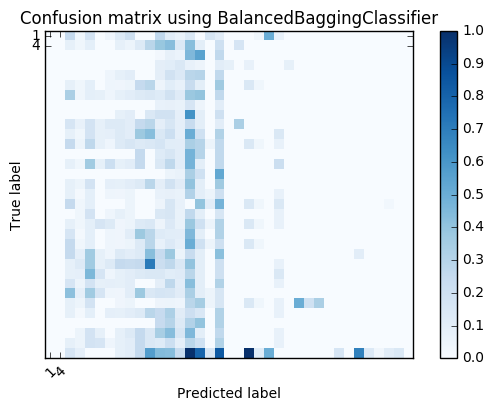

In [173]:
plot_confusion_matrix(X_test, classes=np.unique(DF.iloc[:,38]),title='Confusion matrix using BalancedBaggingClassifier')

plt.show()

In [238]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

print(__doc__)

X = DF.iloc[:,:37]
y = DF.iloc[:,38]
# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                     #      n_informative=3, n_redundant=1, flip_y=0,
                     #      n_features=20, n_clusters_per_class=1,
                     #      n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)
print X_resampled.shape
print np.unique(y,return_counts=True)
print np.unique(y_resampled,return_counts=True)
print idx_samples_removed

Automatically created module for IPython interactive environment
(144L, 37L)
(array([1, 4], dtype=int64), array([179,  72], dtype=int64))
(array([1, 4], dtype=int64), array([72, 72], dtype=int64))
[  1   6   7  12  13  15  16  20  22  23  26  29  33  34  35  37  39  40
  42  43  44  45  46  50  51  52  53  54  55  56  58  60  61  62  63  64
  65  67  68  69  70  71  73  74  77  80  82  84  86  88  89  91  92  95
  96  97  98 100 102 105 106 107 108 109 110 111 112 113 115 116 117 119
 122 123 127 128 130 133 134 136 137 139 141 143 145 146 147 148 150 151
 153 156 158 160 161 162 163 164 165 168 169 170 172 173 175 177 178]


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [231]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print DT.score(X_test,y_test)*100

75.0


In [159]:
data = pd.read_csv('final2.csv',sep=',')

In [229]:
data2 = pd.read_csv('final2.csv',sep=',')

In [221]:
data.columns
        

Index([u'2nd-last', u'Diagnosis', u'check for all act', u'interrupt', u'last',
       u'A001', u'A002', u'A003', u'BATP015', u'BATP016',
       ...
       u'T004', u'T005', u'T101', u'T102', u'T103', u'T104', u'T106', u'T109',
       u'T110', u'unknown'],
      dtype='object', length=176)

In [160]:
index = data['HALRM'].index[data['HALRM'].apply(np.isnan)]

In [230]:
index2 = data2['LALRM'].index[data2['LALRM'].apply(np.isnan)]

In [161]:
df = pd.DataFrame(columns=data.columns)
t = pd.DataFrame(columns=data.columns)
count = []
for i in range(len(data['HALRM'])):
    if(i not in index):
        count.append(i)
        df = df.append(data.loc[i,:])
    else:
        t = t.append(data.loc[i,:])


In [231]:
df2 = pd.DataFrame(columns=data2.columns)
t2 = pd.DataFrame(columns=data2.columns)
count = []
for i in range(len(data2['LALRM'])):
    if(i not in index2):
        count.append(i)
        df2 = df2.append(data2.loc[i,:])
    else:
        t2 = t2.append(data2.loc[i,:])


In [224]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [170]:
len(df['interrupt'])

158

In [232]:
cols2 = df2.columns
class2_ = df2['LALRM']
del df2['LALRM']

In [233]:
del t2['LALRM']

In [168]:
cols = df.columns
class_ = df['HALRM']
del df['HALRM']

In [183]:
len(class_)
del t['HALRM']

In [184]:
halrm = []
x = np.asarray(data)
y = np.asarray(class_)
d = DecisionTreeClassifier()
d.fit(df,class_)
halrm = d.predict(t)


In [234]:
len(df2)

158

In [236]:
lalrm = []

d2 = DecisionTreeClassifier()
d2.fit(df2,class2_)
lalrm=d2.predict(t2)

In [185]:
halrm

array([ 36.,   2.,   2.,   2.,  30.,   8.,   6.,   1.,  10.,   1.,   2.,
         6.,   2.,  26.,   6.,   1.,   2.,   1.,   4.,  36.,  36.,  24.,
         2.,   2.,   2.,   1.,  36.,  26.,  36.,   2.,  11.,   2.,   5.,
         2.,   4.,   9.,   5.,   2.,   1.,   2.,  63.,  42.,   5.,   1.,
        36.,  14.,  48.,   2.,  14.,   2.,   7.,   2.,   2.,   2.,   2.,
         6.,  11.,  11.,  18.,   2.,   2.,  14.,  36.,  11.,   2.,   2.,
         2.,   2.,   2.,   1.,   1.,   2.,   1.,   5.,   2.,   2.,  72.,
        33.,   4.,   2.])

In [199]:
file_=pd.read_csv('final2 - Copy.csv',sep=',')

In [200]:
for j in range(len(index)):
    file_.loc[index[j],'HALRM'] = halrm[j]

In [237]:
for k in range(len(index2)):
    file_.loc[index2[k],'LALRM'] = lalrm[k]

In [238]:
file_.to_csv("1.csv")

In [177]:
x

array([[18,  4,  0, ...,  0,  0,  0],
       [18,  4,  0, ...,  0,  0,  0],
       [18,  4,  0, ...,  0,  0,  0],
       ..., 
       [12,  4,  0, ...,  0,  0,  0],
       [13,  2,  0, ...,  0,  0,  0],
       [13,  2,  0, ...,  0,  0,  0]], dtype=int64)